In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch

In [32]:
# --- Parameters ---
file_path = "0505-153109record_manual_labeled.csv"
df = pd.read_csv(file_path)

# --- Extract columns ---
time = df['time'].values
emg_data = df['measurement'].values
labels = df['label'].values

In [33]:
# --- Estimate sampling frequency from time column ---
time_diffs = np.diff(time)
fs = 1 / np.mean(time_diffs)
print(f"Estimated sampling frequency: {fs:.2f} Hz")

Estimated sampling frequency: 5000.00 Hz


In [34]:
# --- Plotting Function ---
def plot_fft_psd_by_label(emg_data, labels, fs):
    unique_labels = np.unique(labels)

    for label in unique_labels:
        segment = emg_data[labels == label]
        N = len(segment)

        # FFT
        yf = fft(segment)
        xf = fftfreq(N, 1 / fs)
        xf = xf[:N // 2]
        yf = np.abs(yf[:N // 2]) / N

        # PSD
        f_psd, Pxx = welch(segment, fs=fs, nperseg=min(1024, N))

        # Plot
        plt.figure(figsize=(12, 5))

        # FFT Plot
        plt.subplot(1, 2, 1)
        plt.plot(xf, yf)
        plt.title(f'FFT - Label {label}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Amplitude')
        plt.xlim(0, 250)
        plt.ylim(0, 0.1)
        plt.grid(True)

        # PSD Plot
        plt.subplot(1, 2, 2)
        plt.semilogy(f_psd, Pxx)
        plt.title(f'PSD - Label {label}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power/Frequency (dB/Hz)')
        plt.xlim(0, 250)
        plt.grid(True)

        plt.tight_layout()
        plt.show()

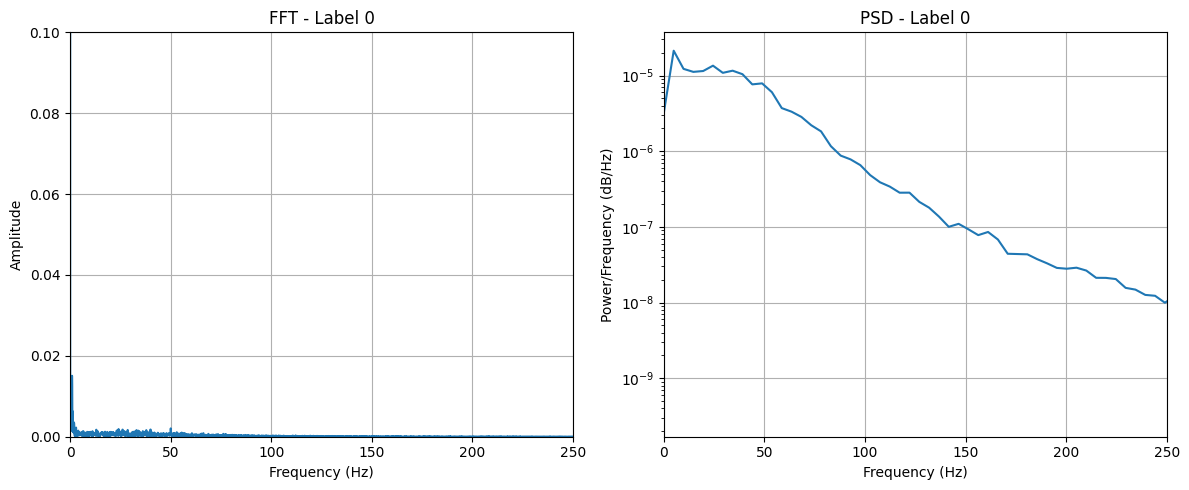

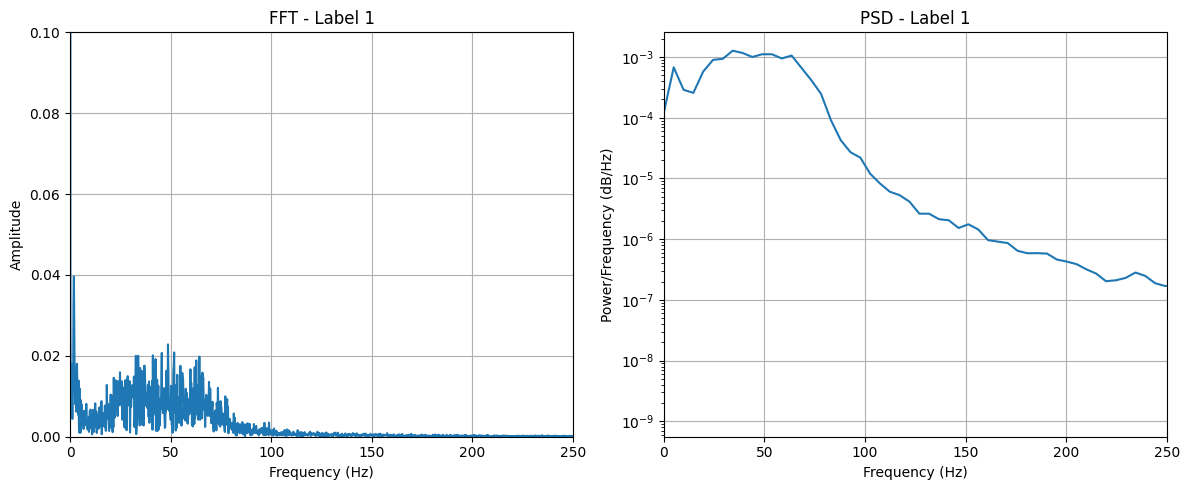

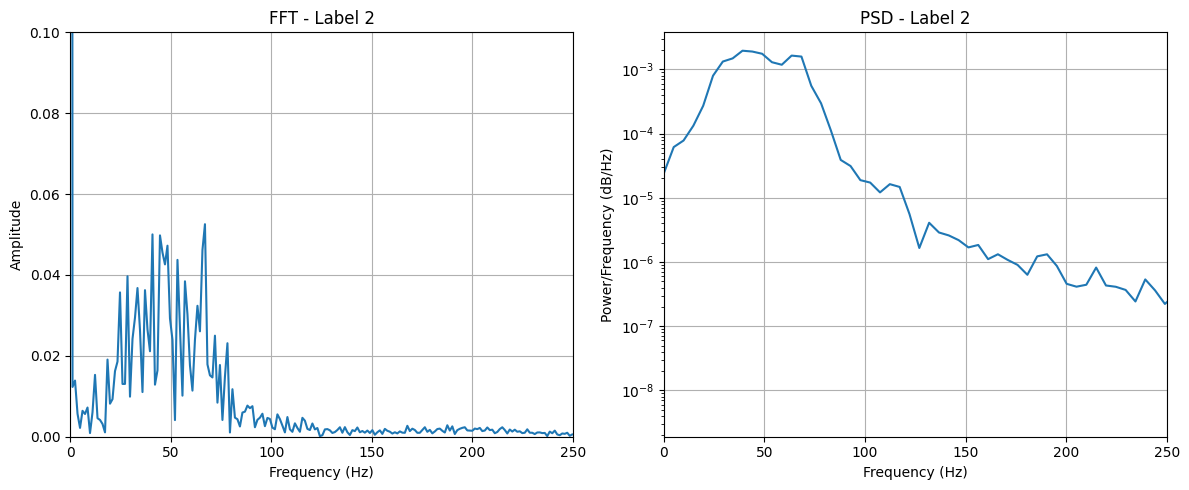

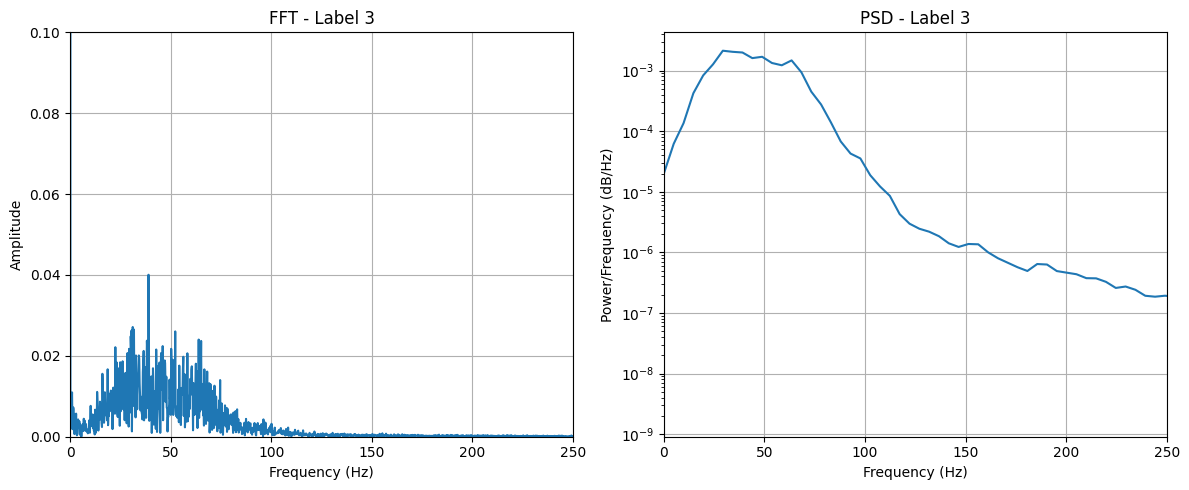

In [35]:
# --- Call the function ---
plot_fft_psd_by_label(emg_data, labels, fs)